# Data Visualization

For practice, we take a look at Netflix dataset to get answers to few questions.

### Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### File retrieval

In [2]:
cwd = os.getcwd()

In [3]:
file = os.path.join(cwd, 'data', 'netflix_titles.csv')

In [4]:
netflix_all = pd.read_csv(file)
netflix_all.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


We can see the type of data we're dealing with

### Checking for null values

In [5]:
netflix_all.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Specifically in the director column, we have lots of missing values.

In [6]:
netflix_all['country'] = netflix_all['country'].fillna(netflix_all['country'].mode()[0])

Fill missing values with mode for country.

In [7]:
netflix_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7787 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
netflix_shows = netflix_all[netflix_all['type']=='TV Show']

In [9]:
netflix_movies = netflix_all[netflix_all['type'] == 'Movie']

### Analysis of movies and shows

<AxesSubplot:xlabel='type', ylabel='count'>

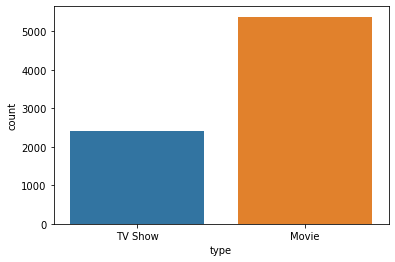

In [10]:
sns.countplot(x='type', data=netflix_all)

It is clear that there are lots of Movies than TV Shows.

<AxesSubplot:xlabel='first_country', ylabel='count'>

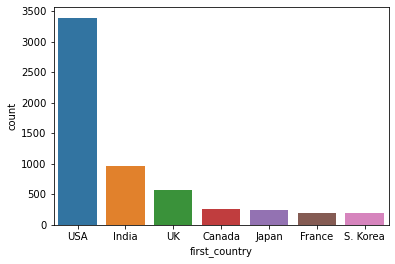

In [11]:
netflix_all['first_country'] = netflix_all['country'].apply(lambda x: x.split(",")[0])
netflix_all['first_country'].replace('United States', 'USA', inplace=True)
netflix_all['first_country'].replace('United Kingdom', 'UK', inplace=True)
netflix_all['first_country'].replace('South Korea', 'S. Korea', inplace=True)

sns.countplot(x='first_country', data=netflix_all, order=netflix_all.first_country.value_counts().iloc[:7].index)

So, USA has the maximum contents with India and UK coming 2nd and 3rd respectively.

In [12]:
new_df = pd.crosstab(netflix_all['first_country'], netflix_all['type'])
new_df['total'] = new_df['Movie'] + new_df['TV Show']
new_df.sort_values(by='total', ascending=False, inplace=True)
new_df.drop(['total'], axis=1, inplace = True)

<AxesSubplot:ylabel='first_country'>

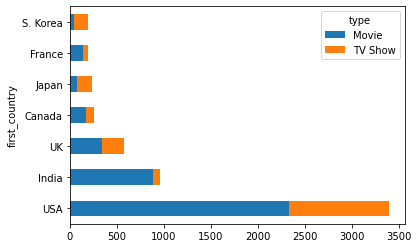

In [13]:
plot_data = new_df.head(7)
plot_data.plot(kind='barh', stacked=True)

Here are the top 7 countries with maximum Movies and TV Shows combined.

In [14]:
plot_data_percentage = plot_data.div(plot_data.sum(axis=1), axis=0)*100
plot_data_percentage

type,Movie,TV Show
first_country,,
USA,68.731563,31.268437
India,92.364017,7.635983
UK,59.098787,40.901213
Canada,67.567568,32.432432
Japan,31.645570,68.354430
France,69.897959,30.102041
S. Korea,21.649485,78.350515


Text(0.5, 0, 'Cumulative Percentage')

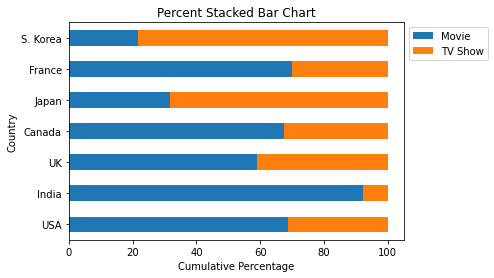

In [15]:
plot_data_percentage.plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Percent Stacked Bar Chart')
plt.ylabel('Country')
plt.xlabel('Cumulative Percentage')

So, percentage stacked bar chart gives out a clearer understanding of how top 7 content delivering countries have their content type divided.

### Now we see a chart that shows the density of shows released based on months wrt each year

In [16]:
netflix_date = netflix_all[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(",")[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split(' ')[0])

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,5.0,20.0,95.0,115.0,185.0,219.0,175.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,3.0,44.0,85.0,160.0,270.0,158.0,0.0
October,0.0,0.0,0.0,11.0,0.0,2.0,4.0,15.0,52.0,130.0,191.0,202.0,173.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,46.0,119.0,126.0,135.0,178.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0,110.0,168.0,145.0,144.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,76.0,155.0,167.0,156.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,19.0,93.0,77.0,175.0,167.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,11.0,87.0,99.0,159.0,173.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,21.0,93.0,117.0,170.0,188.0,0.0


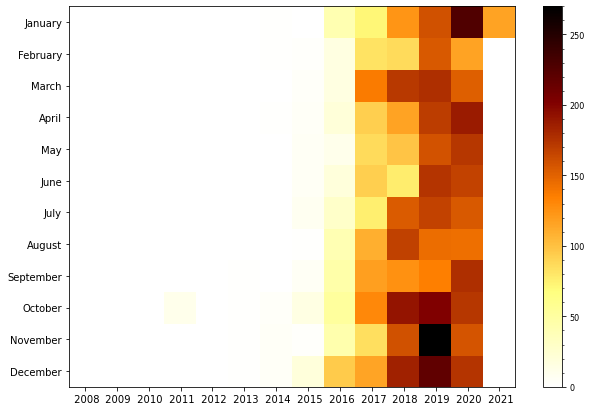

In [18]:
plt.figure(figsize=(10, 7))
plt.pcolor(df, cmap='afmhot_r')
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

This colorbar shows that movies started to be released on Netflix from 2016 December at a rapid pace. This graph is useful for directors and producers who want to release their movies/TV Shows when there is less competition. On 2020, February, August and November were times where less movies/TV Shows were released.

In [19]:
df2 = netflix_all.groupby([netflix_date['year']]).size().reset_index(name="Count")
df2

,year,Count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,25
7,2015,88
8,2016,443
9,2017,1225


<AxesSubplot:xlabel='year', ylabel='Count'>

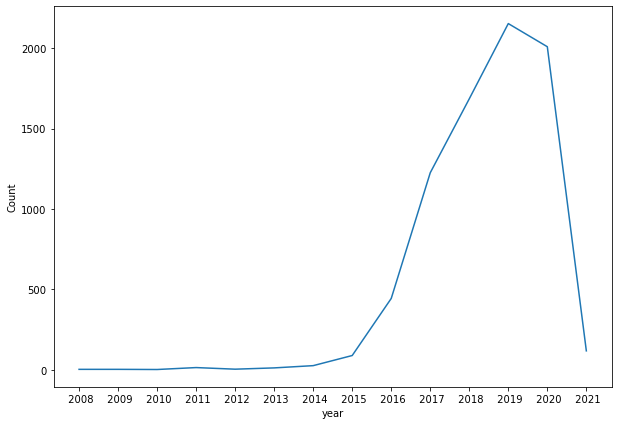

In [20]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=df2, x='year', y='Count')

As we can see that movies and TV Shows were added the most during the time from 2017-2020. It peaked during 2019.

### for Movies

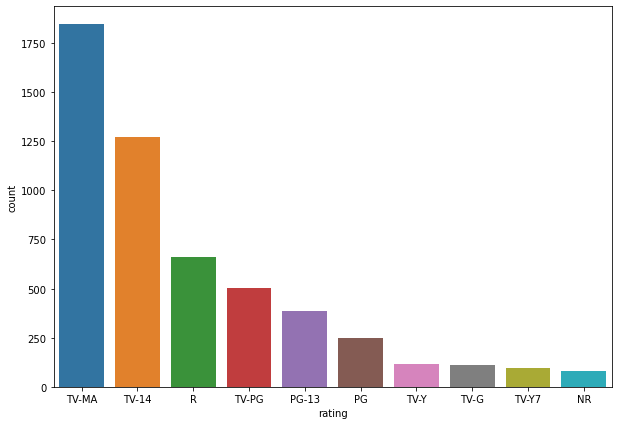

In [21]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x="rating", data=netflix_movies, order=netflix_movies['rating'].value_counts().index[0:10])

This countplot shows the spread of ratings around the Movie type.

In [22]:
netflix_movies['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [23]:
netflix_movies['duration_clean']=netflix_movies['duration'].apply(lambda x: str(x).split(" ")[0])
netflix_movies['duration_clean']

<ipython-input-23-c8540ebe48df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration_clean']=netflix_movies['duration'].apply(lambda x: str(x).split(" ")[0])


1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration_clean, Length: 5377, dtype: object

In [24]:
netflix_movies['duration']=netflix_movies['duration'].str.extract(r"(^\d*)")
netflix_movies['duration']=pd.to_numeric(netflix_movies['duration'])

<ipython-input-24-8ddcf0602002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration']=netflix_movies['duration'].str.extract(r"(^\d*)")
<ipython-input-24-8ddcf0602002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration']=pd.to_numeric(netflix_movies['duration'])


In [1]:
sns.kdeplot(data=netflix_movies['duration'], shade=True)

NameError: name 'sns' is not defined

This shows that most of the movies last around 90-100 minutes mark.

#### Count by Genres

In [26]:
from collections import Counter

In [27]:
genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In [28]:
g

Counter({'Dramas': 2106,
         'InternationalMovies': 2437,
         'HorrorMovies': 312,
         'Action&Adventure': 721,
         'IndependentMovies': 673,
         'Sci-Fi&Fantasy': 218,
         'Thrillers': 491,
         'Documentaries': 786,
         'SportsMovies': 196,
         'Comedies': 1471,
         'RomanticMovies': 531,
         'Movies': 56,
         'Music&Musicals': 321,
         'LGBTQMovies': 90,
         'Faith&Spirituality': 57,
         'Children&FamilyMovies': 532,
         'ClassicMovies': 103,
         'CultMovies': 59,
         'Stand-UpComedy': 329,
         'AnimeFeatures': 57})

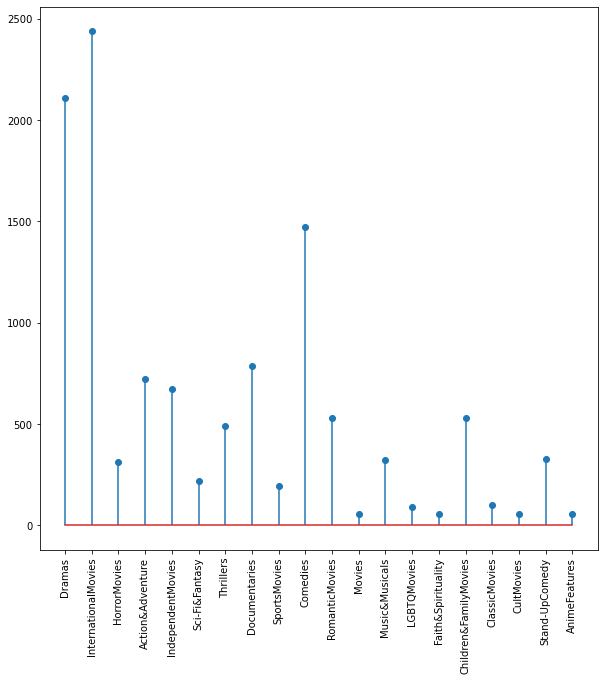

In [29]:
fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
plt.stem(x,y, use_line_collection=True)
plt.xticks(rotation=90)
plt.show()

This lollipop chart shows that there are lots of movies under genre Dramas, International Movies and Comedies.

### For TV SHOWS

In [30]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.extract(r'(^\d*)')
durations['no_of_seasons']=pd.to_numeric(durations['no_of_seasons'])

<ipython-input-30-5249b734a94e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['duration'].str.extract(r'(^\d*)')
<ipython-input-30-5249b734a94e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=pd.to_numeric(durations['no_of_seasons'])


In [31]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<AxesSubplot:xlabel='title'>

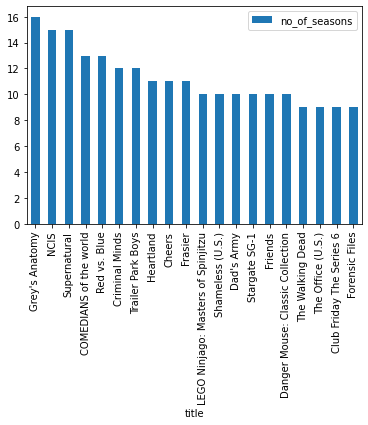

In [32]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons')

This shows that on average, series have 9 seasons with maximum number of season being of Grey's Anatomy with 16 seasons.

In [40]:
g.most_common()

[('InternationalMovies', 2437),
 ('Dramas', 2106),
 ('Comedies', 1471),
 ('Documentaries', 786),
 ('Action&Adventure', 721),
 ('IndependentMovies', 673),
 ('Children&FamilyMovies', 532),
 ('RomanticMovies', 531),
 ('Thrillers', 491),
 ('Stand-UpComedy', 329),
 ('Music&Musicals', 321),
 ('HorrorMovies', 312),
 ('Sci-Fi&Fantasy', 218),
 ('SportsMovies', 196),
 ('ClassicMovies', 103),
 ('LGBTQMovies', 90),
 ('CultMovies', 59),
 ('Faith&Spirituality', 57),
 ('AnimeFeatures', 57),
 ('Movies', 56)]

In [46]:
df = pd.DataFrame(g.most_common(), columns=['Type', 'Count'])

In [47]:
df

,Type,Count
0,InternationalMovies,2437
1,Dramas,2106
2,Comedies,1471
3,Documentaries,786
4,Action&Adventure,721
5,IndependentMovies,673
6,Children&FamilyMovies,532
7,RomanticMovies,531
8,Thrillers,491
9,Stand-UpComedy,329


In [48]:
df2 = df[:5].copy()

In [49]:
df2

,Type,Count
0,InternationalMovies,2437
1,Dramas,2106
2,Comedies,1471
3,Documentaries,786
4,Action&Adventure,721


In [50]:
new_row = pd.DataFrame(data = {
    'Type' : ['others'],
    'Count' : [df['Count'][5:].sum()]
})

In [51]:
df2 = pd.concat([df2, new_row])

In [52]:
df2

,Type,Count
0,InternationalMovies,2437
1,Dramas,2106
2,Comedies,1471
3,Documentaries,786
4,Action&Adventure,721
0,others,4025


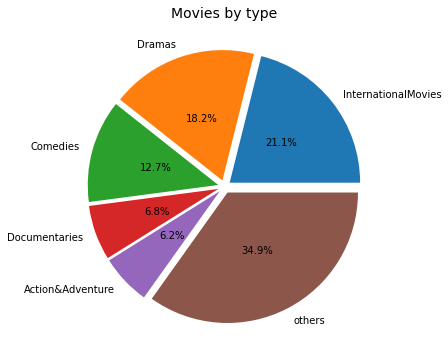

In [64]:
pie, ax = plt.subplots(figsize = [10,6])
labels = df2['Type']
plt.pie(x=df2['Count'], autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Movies by type", fontsize=14);

The pie chart shows that, Netflix has most of the movies under the section International Movies, followed by Dramas and Comedies.

### Conclusion

We can see how a dataset of Netflix movies and tv shows can be presented in different ways to display as much insights as possible. The first thing is to ask questions about the data, and then move forward with how to get the answer through visualization techniques.